# Linear Programming for MIS finding in Graphs

## 1. Generate a random dense graph using NetworkX
This will be the graph that we find the MIS of

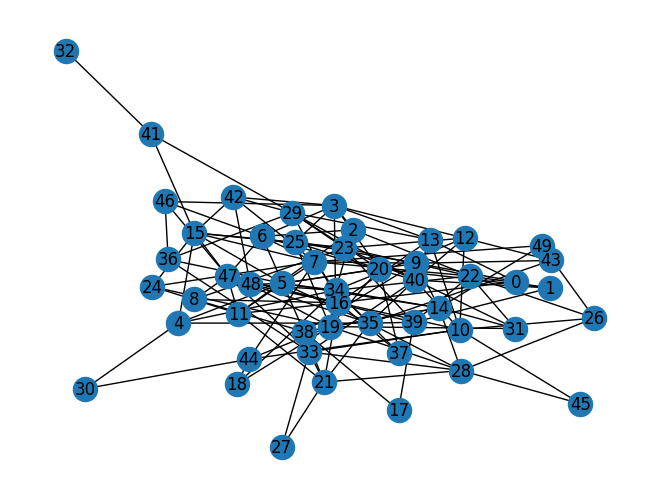

In [2]:
import networkx as nx

NUMBER_OF_NODES = 50
NUMBER_OF_EDGES = 150
SEED = 13

G = nx.generators.dense_gnm_random_graph(NUMBER_OF_NODES, NUMBER_OF_EDGES, seed=SEED)

nx.draw(G, with_labels=True)

In [5]:
import matplotlib.pyplot as plt

import networkx as nx

import numpy as np

import itertools

import time

from numpy import linalg as LA

import cplex

G = nx.relabel.convert_node_labels_to_integers(G)




#from dNN import MIS_ILP_CPLEX_solver


components_before = [G.subgraph(c).copy() for c in nx.connected_components(G)]



################################# remove self loops

self_loop_removal_cntr = 0

for pair in list(G.edges):

    if pair[0] == pair[1]:

        G.remove_edge(pair[0],pair[1])

        self_loop_removal_cntr = self_loop_removal_cntr+1

        #print("self loop in node {} is removed".format([pair[0]]))

print("ALREADY REMOVED {} EDGES BECAUSE OF SELF LOOP".format(self_loop_removal_cntr))





###################################################################################################################

################################# reducntion techiniques come here: ###############################################

###################################################################################################################





#############################################################

################### ILP ###################

#############################################################

########## INPUT: G

########## set of x_n = 1



problem = cplex.Cplex()



list_of_nodes = list(G.nodes)

list_of_pairs_of_edges = list(G.edges)



### dictionary of id's

node_id = {(n): 'node_id({0})'.format(n) for (n) in list_of_nodes}

problem.objective.set_sense(problem.objective.sense.maximize)

problem.variables.add(names=list(node_id.values()),lb=[0.0]*len(node_id), ub=[1.0]*len(node_id))

problem.variables.set_types([(i, problem.variables.type.binary) for i in node_id.values()])



## objective:

problem.objective.set_linear(list(zip(list(node_id.values()), [1.0] * len(node_id))))



## constraint: for all (u,v)\in E, node_id(u) + node_id(v) <= 1

""" Constraint (1) """

for (u,v) in list_of_pairs_of_edges:

    #if u != v:

    lin_expr_vars_1 = []

    lin_expr_vals_1 = []

    lin_expr_vars_2 = []

    lin_expr_vals_2 = []

    lin_expr_vars_1.append(node_id[(u)])

    lin_expr_vals_1.append(1.0)

    lin_expr_vars_2.append(node_id[(v)])

    lin_expr_vals_2.append(1.0)

    problem.linear_constraints.add(lin_expr=[

        cplex.SparsePair(lin_expr_vars_1 + lin_expr_vars_2, val=lin_expr_vals_2 + lin_expr_vals_2)],

        rhs=[1.0], senses=["L"],

        names=['(1)_'])





## write program for testing

#problem.write("LP_test_BOSS_combi.lp")

problem.solve()



if problem.solution.get_solution_type() == 0:

    print("CPLEX is outputting no solution exists")

if problem.solution.get_solution_type() != 0:



    node_id_star = problem.solution.get_values()

    ### removing nodes in (node_id_star == 1) along with their nieghbors

    nodes_tobe_removed = np.where(np.array(node_id_star)==1)



    if len(nodes_tobe_removed[0])==0:

        print("############# ILP is solved , BUT without ones. This scenario should nlt happen ##############")



    MIS = nodes_tobe_removed

    print(MIS[0])

    print("A solution is found with length = ", len(MIS[0]))

ALREADY REMOVED 0 EDGES BECAUSE OF SELF LOOP
Version identifier: 22.1.1.0 | 2023-02-11 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 0.000000 after 0.00 sec. (0.00 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 62 rows and 4 columns.
MIP Presolve modified 40 coefficients.
Aggregator did 1 substitutions.
Reduced MIP has 87 rows, 45 columns, and 211 nonzeros.
Reduced MIP has 45 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.23 ticks)
Probing time = 0.00 sec. (0.02 ticks)
Tried aggregator 1 time.
Detecting symmetries...
MIP Presolve eliminated 2 rows and 0 columns.
Reduced MIP has 85 rows, 45 columns, and 207 nonzeros.
Reduced MIP has 45 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.15 ticks)
Probing time = 0.00 sec. (0.02 ticks)
Clique table members: 85.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up 

      0     0        cutoff             20.0000       20.5000       55    2.50%
Elapsed time = 0.02 sec. (0.75 ticks, tree = 0.01 MB, solutions = 4)

Root node processing (before b&c):
  Real time             =    0.02 sec. (0.76 ticks)
Parallel b&c, 12 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.02 sec. (0.76 ticks)
[ 0  1  2  5  8 10 17 18 24 25 27 28 29 30 31 32 37 43 46 49]
A solution is found with length =  20
